## Import & Data load

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv('Selected_HRV_dataset.csv', encoding='ISO-8859-1')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               115 non-null    int64  
 1   Gender            115 non-null    object 
 2   SBP               115 non-null    int64  
 3   DBP               115 non-null    int64  
 4   PP                115 non-null    int64  
 5   Pulse             115 non-null    int64  
 6   Blood_saturation  114 non-null    float64
 7   Temp              114 non-null    float64
 8   RMSSD             115 non-null    float64
 9   VA                115 non-null    int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 9.1+ KB


In [2]:
df.head()

,Age,Gender,SBP,DBP,PP,Pulse,Blood_saturation,Temp,RMSSD,VA
0,19,M,126,74,52,92,100.0,37.3,13.92,0
1,63,F,189,78,111,64,98.0,36.8,199.22,0
2,31,M,110,62,48,88,97.0,36.7,17.98,0
3,31,M,110,60,50,68,97.0,36.7,15.31,0
4,43,M,120,85,35,85,98.0,36.6,10.50,0


## Data preprocessing

### Label encoding

In [3]:
from sklearn.preprocessing import LabelEncoder

# Encode the 'Gender' column as a numeric type
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.head()

,Age,Gender,SBP,DBP,PP,Pulse,Blood_saturation,Temp,RMSSD,VA
0,19,1,126,74,52,92,100.0,37.3,13.92,0
1,63,0,189,78,111,64,98.0,36.8,199.22,0
2,31,1,110,62,48,88,97.0,36.7,17.98,0
3,31,1,110,60,50,68,97.0,36.7,15.31,0
4,43,1,120,85,35,85,98.0,36.6,10.50,0


### Handling missing values

In [4]:
df.dropna(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 0 to 114
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               114 non-null    int64  
 1   Gender            114 non-null    int64  
 2   SBP               114 non-null    int64  
 3   DBP               114 non-null    int64  
 4   PP                114 non-null    int64  
 5   Pulse             114 non-null    int64  
 6   Blood_saturation  114 non-null    float64
 7   Temp              114 non-null    float64
 8   RMSSD             114 non-null    float64
 9   VA                114 non-null    int64  
dtypes: float64(3), int64(7)
memory usage: 9.8 KB


## SMOTE

In [6]:
# Separate features (X) from the target (y)
X = df.drop(['VA'], axis=1)
y = df['VA']

In [7]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X, y)

## Split Dataset


In [8]:
from sklearn.model_selection import train_test_split

X=df.drop(['VA'], axis=1)
y=df['VA']
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

### Scaling

In [9]:
# log scaling
X_train_log = X_train.copy()
X_test_log = X_test.copy()

for col in ['Age', 'PP', 'Temp', 'RMSSD']:
    X_train_log[col] = np.log(X_train_log[col] + 1)
    X_test_log[col] = np.log(X_test_log[col] + 1)

X_train_log.head()

,Age,Gender,SBP,DBP,PP,Pulse,Blood_saturation,Temp,RMSSD
163,3.218876,0,109,60,3.912023,75,98.122088,3.637525,2.974698
65,3.044522,1,133,86,3.871201,95,98.000000,3.645450,2.560323
112,3.135494,1,99,56,3.784190,97,99.000000,3.629660,2.479056
186,4.110874,1,129,88,3.737670,78,99.407652,3.630838,2.367060
155,4.077537,0,128,83,3.828641,70,99.624354,3.639575,2.371978


In [10]:
# Standard scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Choose scaling columns
numeric_columns = X_train_log.columns.drop(['Gender'])

# Apply standard scaling
X_train_ss = scaler.fit_transform(X_train_log[numeric_columns])
X_test_ss = scaler.transform(X_test_log[numeric_columns])

# Convert the result to pandas DataFrame
X_train_ss = pd.DataFrame(X_train_ss, columns=numeric_columns, index=X_train.index)
X_test_ss = pd.DataFrame(X_test_ss, columns=numeric_columns, index=X_test.index)

# Add Gender feature
X_train_ss['Gender'] = X_train['Gender'].values
X_test_ss['Gender'] = X_test['Gender'].values

X_train_ss.head()

,Age,SBP,DBP,PP,Pulse,Blood_saturation,Temp,RMSSD,Gender
163,-1.076797,-1.008592,-1.077370,-0.227374,-0.604261,0.073426,0.086400,0.157788,0
65,-1.539110,0.436835,1.091454,-0.423012,0.778446,-0.005255,0.752843,-0.443470,1
112,-1.297891,-1.610854,-1.411036,-0.840012,0.916717,0.639208,-0.574973,-0.561389,1
186,1.288413,0.195931,1.258286,-1.062957,-0.396855,0.901924,-0.475935,-0.723895,1
155,1.200019,0.135704,0.841205,-0.626978,-0.949938,1.041580,0.258792,-0.716759,0


## Training

In [11]:
import lightgbm as lgb
from sklearn.metrics import precision_recall_curve, roc_curve, auc, accuracy_score, recall_score

In [14]:
# LGBM model training
model = lgb.LGBMClassifier(random_state=42)
model.fit(X_train_ss, y_train)

[LightGBM] [Info] Number of positive: 75, number of negative: 79
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000835 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 287
[LightGBM] [Info] Number of data points in the train set: 154, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.487013 -> initscore=-0.051960
[LightGBM] [Info] Start training from score -0.051960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

LGBMClassifier(random_state=42)

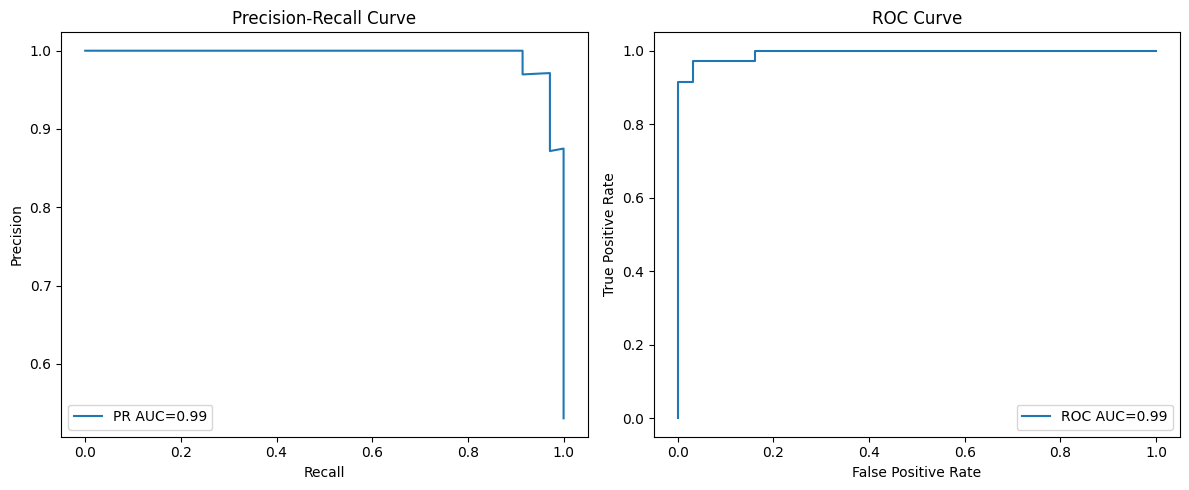

Accuracy: 0.9545, Recall: 0.9714, PR AUC: 0.9947, ROC AUC: 0.9935


In [15]:
# Calculating metrics
y_pred_proba = model.predict_proba(X_test_ss)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
roc_fpr, roc_tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(roc_fpr, roc_tpr)
pr_auc = auc(recall, precision)
accuracy = accuracy_score(y_test, model.predict(X_test_ss))
recall_score_val = recall_score(y_test, model.predict(X_test_ss))

# Visualize PR-AUC, ROC-AUC
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(recall, precision, label=f'PR AUC={pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(roc_fpr, roc_tpr, label=f'ROC AUC={roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()

plt.tight_layout()
plt.show()

# Print metrics
print(f'Accuracy: {accuracy:.4f}, Recall: {recall_score_val:.4f}, PR AUC: {pr_auc:.4f}, ROC AUC: {roc_auc:.4f}')


In [16]:
from joblib import dump

# Save LGBM model
dump(model, 'lgbm_model.joblib')

['lgbm_model.joblib']

In [17]:
# Save Standard Scaler
dump(scaler, 'standard_scaler.joblib')

['standard_scaler.joblib']